# Grammar of graphics in python: datavisualizatie met Altair

- Python heeft veel visualizatie mogelijkheden
- Voor data exploratie belangijk dat het snel mogelijk is om data te visualizeren en het liefst interactief.
- Veel packages geprobeerd met wisselende resulaten (onder andere Bokeh, Plotly, Matplotlib en Seaborn). 
- Blog is geen uitgebreidde vergelijking van alle mogelijke plot libraries in python.
- Persoonlijke favoriet is Altair.
- Blog uitleggen waarom Altair ik heb meest efficient plots kan maken in Altair.

# Grammar-of-graphics
- Het heeft een tijd geduurd voordat ik erachter kwam waarom ik Altair zou verkiezen boven de andere plot libraries die ik in getest hebt. Natuurlijk zijn de opmaak van de grafieken, en het gemak om interactieve grafieken hier belangrijk in. Maar het is voornamelijk de API waarmee de code geschreven wordt die het maken van plots intuitief maakt. 
- Grammar of Graphics. 
- Manier van visualizaties definieren en opbouwen (raad eens waar  GG van het bekenste plot package van R ggplot voor staat).
- Python nog ander grammer of graphics package, namelijk plotnine. Hier heb ik geen ervaring mee.
- Blog opbouwen intuitie van grammar of graphics en waarom persoonlijk efficienter ten opzichte van matplotlib en seaborn.

# Vergelijking API van matplotlib, seaborn en altair.
- Matplotlib low level, maar alles is mogelijk. Bevat ook highlevel functies. Door veel verschillende mogelijkheden moet ik altijd de syntax googlen.
- Seaborn high level, vaak hacks nodig. Goede integratie met pandas dataframes.
- Seaborn ook werkt aan grammar-of-graphics.
- Ik ben geen expert in deze packages, dus zou kunnen dat voorbeelden simpeler kunnen.


Blog gedeeltelijk gebaseerd op youtube vide van Jake VanderPlas.
https://www.youtube.com/watch?v=FytuB8nFHPQ

## Package backends

- Matplotlib backend
    
- Javascript backend
    Interactief, werkt goed in combinatie met jupyter, vereist javascript.
    
## High level, low level.
    


## Tidy dataset

In [1]:
import altair as alt
from vega_datasets import data

alt.renderers.enable("mimetype");

df = data.iris()
df.head(5)

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Matplotlib

Ter illustaratie kies ik een voorbeeld waar de grammar-of-graphics goed tot uiting komt, namelijk een kolom met 3 scatterplots van de 3 verschillende species in de iris dataset. Daarnaast wil ik de as limieten handmatig configureren.

Zoals het code voorbeeld laat zien is het in matplotlib bewerkelijk om het figuur op te bouwen. Er moet namelijk:
1) Een leeg canvas gecreerd worden met de 3 subplots
2) Ieder subplot moet individueel gevuld met de juiste data en opgemaakt worden met aslimiten, aslabels en subplottitels.

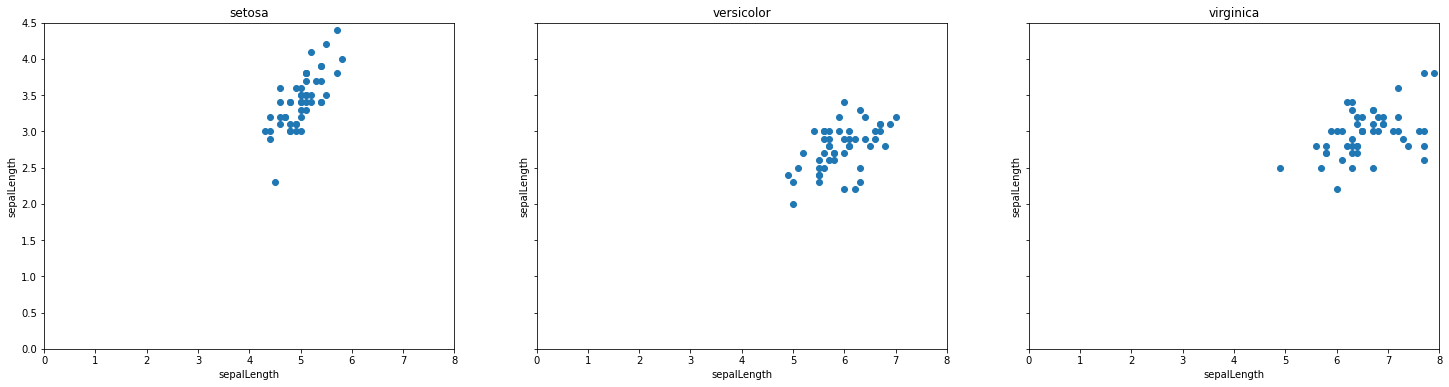

In [2]:
import matplotlib.pyplot as plt

species = df["species"].unique()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 6), sharex=True, sharey=True)
for idx, specie in enumerate(species):
    # Aanmaken van de scatterplot
    _df = df.query("species==@specie")
    axs[idx].scatter(x=_df["sepalLength"], y=_df["sepalWidth"])
    
    # Laten we direct het figuur op maken als we toch loopen
    axs[idx].set_ylim(0,4.5)
    axs[idx].set_xlim(0,8)
    
    axs[idx].set_title(specie)
    axs[idx].set_xlabel("sepalLength")
    axs[idx].set_ylabel("sepalLength")

## Seaborn

De API van seaborn bevat verschillende high-level functies voor voornamelijk statische weergaves van data. Bijvoorbeeld `sns.scatterplot` en `sns.boxplot`. Hierdoor is het met seaborn heel makkelijk om snel standaard statistische grafieken te maken. Doordat seaborn goede Pandas integratie heeft, zijn de figuren en assen automatisch gelabeld.

Echter, doordat Seaborn een high level interface heeft, schiet het in mijn ervaring snel tekort. Om het figuur met facet van het voorbeel te plotten voldoet `sns.scatterplot` niet meer. Er wordt aangeraden om `sns.relplot` te gebruiken. Deze functie gebruikt `sns.FacetGrid` om het facet te bouwen. Ik moet kwargs voor `sns.FacetGrid` meegeven om as-limieten in te stellen. In mijn ervaring is het ook vaak nodig om het onderliggende matplotlib object aan te passen, zodat de layout wordt zoals ik wil.

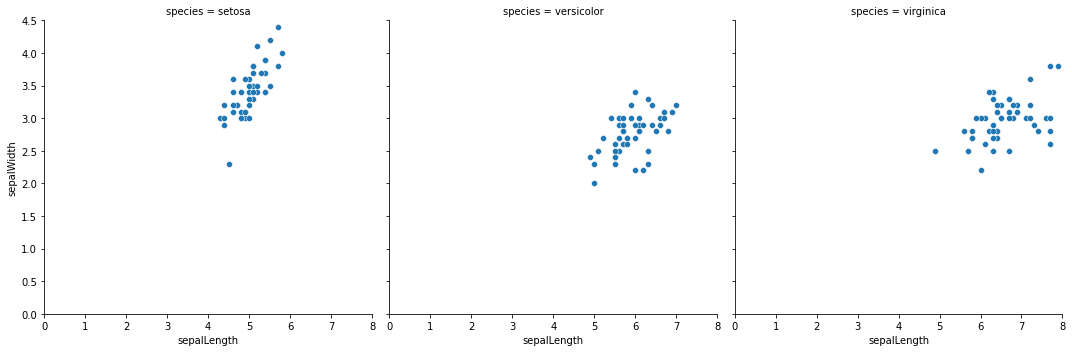

In [3]:
import seaborn as sns

# Let op: ik kan geen sns.scatterplot gebruiken om facet van 3 kolommen te genereren.
# Daarnaast moeten xlim en ylim meegegeven als kwargs sns.Facetplot die gebruikt wordt de facet te creeren.
facet_kws = {
    "sharey":True, 
    "xlim":(0,8), 
    "ylim":(0,4.5)
}
sns.relplot(
    data=df, 
    x=df["sepalLength"], 
    y=df["sepalWidth"], 
    kind="scatter", 
    col="species", 
    facet_kws=facet_kws);

## Altair

In altair wordt een figuur op een logische manier opgebouwd door het chainen van Altair objecten. Hier zie je dat we 
1) Een Chart object initializeren met de data.
2) We specificeren de data voor de assen, en direct ook dat de `species` kolom gebruikt wordt om het figuur in 3 subplots op te delen
3) Vervolgens specificeren we dat we de data als `points` willen visualizeren, via `mark_point()`.

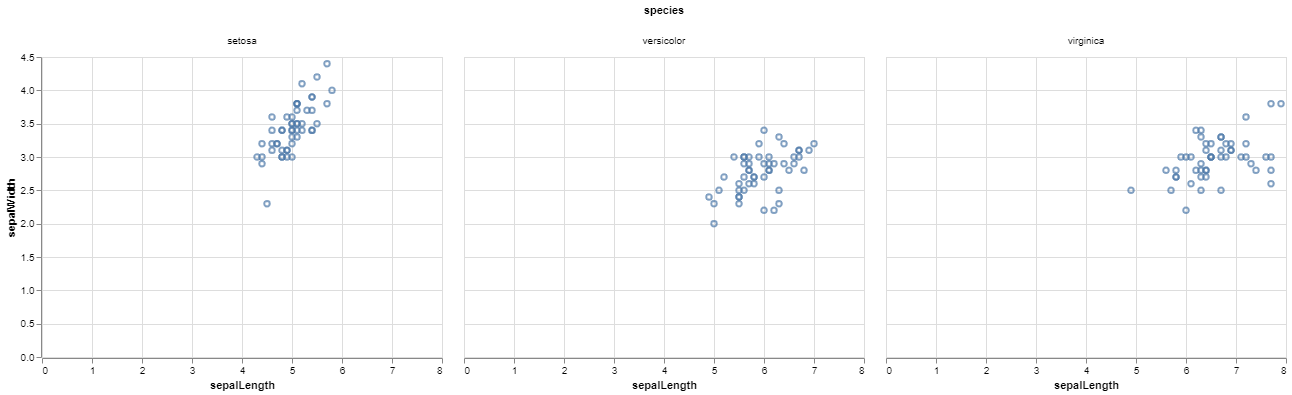

In [4]:
# Om x en y limiten te defineren verwachten de X als een Scale object.
(
    alt
    .Chart(df)
    .encode(
        x=alt.X("sepalLength", scale=alt.Scale(domain=(0,8))),
        y=alt.Y("sepalWidth", scale=alt.Scale(domain=(0,4.5))), 
        column="species"
    )
    .mark_point()
)

# Opbouw van figuren met GG

Om de logica te illusteren, bouwen we het voorbeeld stap voor stap op. In het voorbeeld hieronder zie je dat:

1) We laden de data in een Chart object en visualizeren dit als een punt. De output geeft een overlappend punt weer voor ieder datapunt in ons dataframe.
2) Vervolgens splitsen we de data op de x-as door het toevoegen van een x-ax encoding. Output is een 1-D scatter plot.
3) Door toevoegen van y-as krijgen we een scatter plot.
4) Toevoegen van `column` enconding zorgt ervoor dat data verspreid wordt over 3 species scatter plots.

https://altair-viz.github.io/getting_started/starting.html

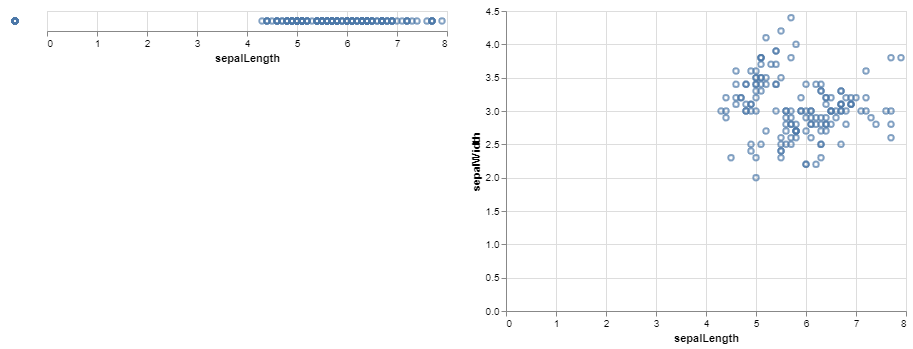

In [8]:
points = (
    alt
    .Chart(df)
    .mark_point()
)

x_points = points.encode(x="sepalLength")
x_y_points = x_points.encode(y="sepalWidth")

# Plots kunnen makkelijk horizontaal naast elkaar worden weergegeven mbv de `|` operator
points | x_points | x_y_points

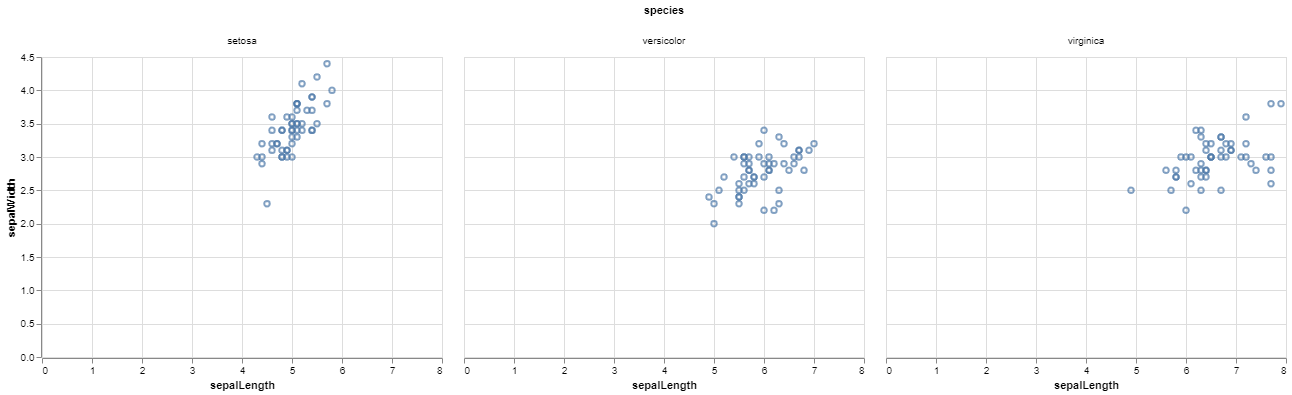

In [6]:
# Zoals je waarschijnlijk al kan raden
facet = x_y_points.encode(column="species")
facet